In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [40]:
df = pd.read_csv('Mumbai_99acers_cleaned.csv')
logdf = pd.read_csv('Mumbai_99acers_logtransformed.csv')
     

In [12]:
logdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13541 entries, 0 to 13540
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl no.          13541 non-null  int64  
 1   society         13541 non-null  object 
 2   type            13541 non-null  object 
 3   location        13541 non-null  object 
 4   lattitude       2174 non-null   float64
 5   longitude       2174 non-null   float64
 6   bedrooms        13541 non-null  object 
 7   built-up area   13541 non-null  float64
 8   furnishing      13541 non-null  object 
 9   age             13541 non-null  object 
 10  floor           13541 non-null  object 
 11  total floors    13541 non-null  object 
 12  dealer          13478 non-null  object 
 13  posted          13541 non-null  object 
 14  monthly rent    13541 non-null  int64  
 15  property photo  13541 non-null  int64  
 16  property video  13541 non-null  int64  
 17  society photo   13541 non-null 

In [16]:
df['area-per-bedroom'] = df['built-up area']/df['bedrooms']

In [17]:
logdf['area-per-bedroom'] = logdf['built-up area']/logdf['bedrooms']
logdf.head()

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent,area-per-bedroom
0,other society,Residential Apartment,Bandra (West),2,800.0,Furnished,5 to 10 years old,2,6,11.350407,400.000000
1,other society,Residential Apartment,Khar West,2,1050.0,Furnished,1 to 5 years old,8,12,11.608236,525.000000
2,Gajra Bhoomi Symphony,Residential Apartment,Sector-20 Koparkhairane,2,1050.0,Unfurnished,1 to 5 years old,14,17,10.373491,525.000000
3,Crescent Bay,Residential Apartment,Parel,3,2275.0,Semifurnished,1 to 5 years old,40,41,11.918391,758.333333
4,Ashwini CHS,Residential Apartment,Tilak Nagar,1,550.0,Semifurnished,5 to 10 years old,4,7,10.203592,550.000000


In [18]:
temp = pd.get_dummies(df, drop_first=True)
corr = temp.corr()['monthly rent'].sort_values()

In [19]:
logtemp = pd.get_dummies(logdf, drop_first=True)
logcorr = logtemp.corr()['monthly rent'].sort_values()
     

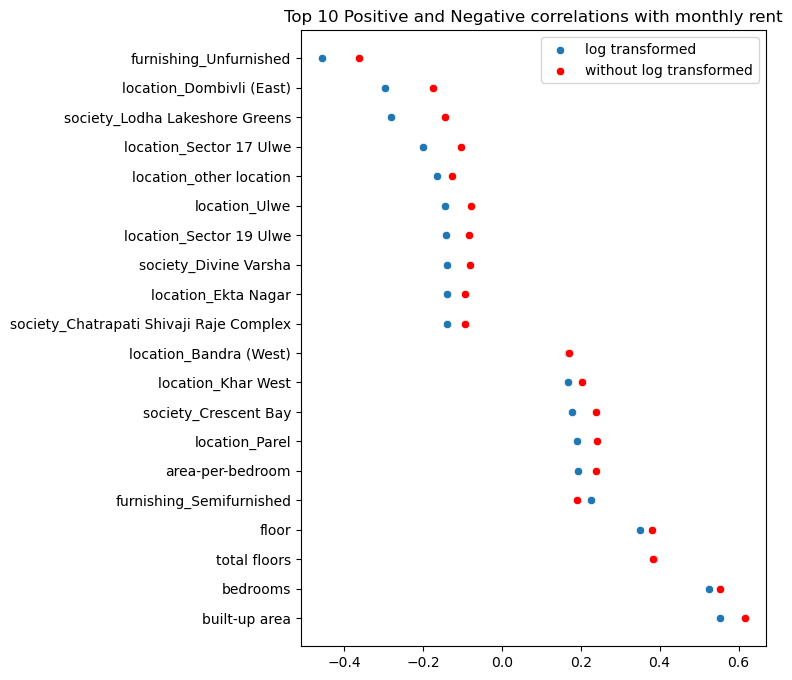

In [20]:
plt.figure(figsize=(6,8))

sns.scatterplot(y= logcorr.head(10).index.append(logcorr.tail(11)[:-1].index), 
                x= list(logcorr.head(10).values) + list(logcorr.tail(11)[:-1].values), label='log transformed')
sns.scatterplot(y= logcorr.head(10).index.append(logcorr.tail(11)[:-1].index), 
                x= corr[logcorr.head(10).index.append(logcorr.tail(11)[:-1].index)].values, color='red', label='without log transformed')
plt.title('Top 10 Positive and Negative correlations with monthly rent')
plt.legend()
plt.show()

In [21]:
x = temp.drop('monthly rent', axis = 1)
y = temp['monthly rent']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10237, 356), (2560, 356), (10237,), (2560,))

In [22]:
logx = logtemp.drop('monthly rent', axis = 1)
logy = logtemp['monthly rent']

logx_train, logx_test, logy_train, logy_test = train_test_split(logx, logy, test_size=0.2, random_state=42)
logx_train.shape, logx_test.shape, logy_train.shape, logy_test.shape

((10237, 356), (2560, 356), (10237,), (2560,))

In [23]:
linear = Pipeline([('scaler', StandardScaler()),
                   ('model', LinearRegression())])

In [24]:
linear.fit(X_train, y_train)
print('r2 score:',r2_score(y_test, linear.predict(X_test)))
print('rmse:',mean_squared_error(y_test, linear.predict(X_test))**.5)

r2 score: 0.8850245689137236
rmse: 12192.75732982846


In [25]:

linear.fit(logx_train,logy_train)
print('r2 score:',r2_score(logy_test, linear.predict(logx_test)))
print('rmse:',mean_squared_error(logy_test, linear.predict(logx_test))**.5)
     

r2 score: 0.9275597384386108
rmse: 0.19853476814678472


In [26]:
Final_Scores = pd.DataFrame( index = ['With Training Data r2 score','With Test Data r2 score',
                                       'With Training Data rmse', 'With Test Data rmse'])

models = [LinearRegression(), Ridge(), Lasso()]
names = ['LinearRegression', 'Ridge', 'Lasso']

for name,model in zip(names,models):

  pipeline = Pipeline([('scaler', StandardScaler()),
                    (name, model)])
  
  pipeline.fit(logx_train,logy_train)

  Final_Scores[name] = [round(r2_score(logy_train, pipeline.predict(logx_train)), 4), 
                         round(r2_score(logy_test, pipeline.predict(logx_test)), 4),
                         round(mean_squared_error(logy_train, pipeline.predict(logx_train))**.5, 4),
                         round(mean_squared_error(logy_test, pipeline.predict(logx_test))**.5, 4)]
else:
  display(Final_Scores)

,LinearRegression,Ridge,Lasso
With Training Data r2 score,0.9210,0.9209,0.0000
With Test Data r2 score,0.9276,0.9276,-0.0001
With Training Data rmse,0.2071,0.2071,0.7365
With Test Data rmse,0.1985,0.1985,0.7377


In [27]:
param_grid = {'alpha':[.0001,.001, .01, .1, 1, 10, 100]}

model = GridSearchCV(Ridge(), param_grid, cv=5)
model.fit(logx_train,logy_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]})

In [28]:
model.best_params_, model.best_score_

({'alpha': 0.001}, 0.9170490887456205)

In [29]:
print('r2 score:',r2_score(logy_test, model.predict(logx_test)))
print('rmse:',mean_squared_error(logy_test, model.predict(logx_test))**.5)
     

r2 score: 0.9275667338831006
rmse: 0.19852518181695208


In [41]:

models = [DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]
names = ['DecisionTreeRegressorOHE', 'RandomForestRegressorOHE', 'GradientBoostingRegressorOHE']

for name,model in zip(names,models):

  model.fit(logx_train,logy_train)

  Final_Scores[name] = [round(r2_score(logy_train, pipeline.predict(logx_train)), 4), 
                         round(r2_score(logy_test, pipeline.predict(logx_test)), 4),
                         round(mean_squared_error(logy_train, pipeline.predict(logx_train))**.5, 4),
                         round(mean_squared_error(logy_test, pipeline.predict(logx_test))**.5, 4)]
else:
  display(Final_Scores)

,LinearRegression,Ridge,Lasso,DecisionTreeRegressorOHE,RandomForestRegressorOHE,GradientBoostingRegressorOHE
With Training Data r2 score,0.9210,0.9209,0.0000,0.0000,0.0000,0.0000
With Test Data r2 score,0.9276,0.9276,-0.0001,-0.0001,-0.0001,-0.0001
With Training Data rmse,0.2071,0.2071,0.7365,0.7365,0.7365,0.7365
With Test Data rmse,0.1985,0.1985,0.7377,0.7377,0.7377,0.7377


In [43]:
df1 = logdf.copy()
df1.head(3)

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
0,other society,Residential Apartment,Bandra (West),2,800.0,Furnished,5 to 10 years old,2,6,11.350407
1,other society,Residential Apartment,Khar West,2,1050.0,Furnished,1 to 5 years old,8,12,11.608236
2,Gajra Bhoomi Symphony,Residential Apartment,Sector-20 Koparkhairane,2,1050.0,Unfurnished,1 to 5 years old,14,17,10.373491


In [44]:
society_encoder = LabelEncoder().fit(df1['society'])
df1['society'] = society_encoder.transform(df1['society'])

type_encoder = LabelEncoder().fit(df1['type'])
df1['type'] = type_encoder.transform(df1['type'])

furnishing_encoder = LabelEncoder().fit(df1['furnishing'])
df1['furnishing'] = furnishing_encoder.transform(df1['furnishing'])

location_encoder = LabelEncoder().fit(df1['location'])
df1['location'] = location_encoder.transform(df1['location'])

age_encoder = LabelEncoder().fit(df1['age'])
df1['age'] = age_encoder.transform(df1['age'])

In [45]:
df1

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
0,176,1,8,2,800.0,0,3,2,6,11.350407
1,176,1,63,2,1050.0,0,1,8,12,11.608236
2,36,1,128,2,1050.0,3,1,14,17,10.373491
3,20,1,88,3,2275.0,2,1,40,41,11.918391
4,8,1,150,1,550.0,2,3,4,7,10.203592
...,...,...,...,...,...,...,...,...,...,...
12792,176,1,94,3,2529.0,0,1,12,32,12.072541
12793,150,1,83,3,1382.0,2,0,27,40,10.778956
12794,176,1,165,3,1750.0,3,2,9,16,12.206073
12795,176,1,109,2,950.0,2,3,8,10,10.146434


In [46]:
x_train, x_test, y_train, y_test = train_test_split(df1.drop('monthly rent', axis = 1), df1['monthly rent'], test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((10237, 9), (2560, 9), (10237,), (2560,))

In [48]:
models = [DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]
names = ['DecisionTreeRegressorLE', 'RandomForestRegressorLE',  'GradientBoostingRegressorLE']


for name,model in zip(names,models):

  model.fit(x_train,y_train)

  Final_Scores[name] = [round(r2_score(y_train, model.predict(x_train)), 4), 
                         round(r2_score(y_test, model.predict(x_test)), 4),
                         round(mean_squared_error(y_train, model.predict(x_train))**.5, 4),
                         round(mean_squared_error(y_test, model.predict(x_test))**.5, 4)]
else:
  display(Final_Scores)

,LinearRegression,Ridge,Lasso,DecisionTreeRegressorOHE,RandomForestRegressorOHE,GradientBoostingRegressorOHE,DecisionTreeRegressorLE,RandomForestRegressorLE,GradientBoostingRegressorLE
With Training Data r2 score,0.9210,0.9209,0.0000,0.0000,0.0000,0.0000,0.9988,0.9782,0.8114
With Test Data r2 score,0.9276,0.9276,-0.0001,-0.0001,-0.0001,-0.0001,0.7534,0.8568,0.8042
With Training Data rmse,0.2071,0.2071,0.7365,0.7365,0.7365,0.7365,0.0251,0.1088,0.3199
With Test Data rmse,0.1985,0.1985,0.7377,0.7377,0.7377,0.7377,0.3663,0.2792,0.3264
